# Installing Dependencies

In [70]:
pip install neattext
pip install textblob
pip install spacy
spacy download en_core_web_sm

SyntaxError: invalid syntax (3606986135.py, line 1)

# Importing Dependencies

In [ ]:
import pandas as pd  #package for data analysis 
import seaborn as sns #package for data visualization
import matplotlib.pyplot as plt #package for data visualization
import neattext as nt #package for text cleaning
from collections import Counter #package for counting occurence of terms

# Reading the Data

In [ ]:
df=pd.read_json('frames.json')  #reading json data using pandas read_json function

### Features in the Data

In [ ]:
df.columns   #getting features present in our data

### Shape of the Data

In [ ]:
df.shape

### Checking Null Values

In [ ]:
df.isnull().sum()

### Extracing User Survey Rating

In [ ]:
def extract_userSurveyRating(label):
    return list(label.values())[0] #getting userSurveyRating value dictionary values

In [ ]:
df['userSurveyRating']=df['labels'].apply(lambda x:extract_userSurveyRating(x))

### Displaying Survey Ratings

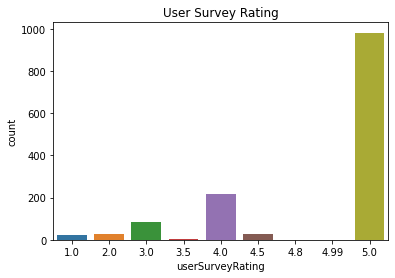

In [71]:
import warnings  #package for ignoring warnings
warnings.filterwarnings('ignore' )
sns.countplot(df['userSurveyRating'])  #counting occurence of each rating in the data
plt.title("User Survey Rating")   #assigning title to visualization
plt.show()

### Extract Wizard Survey Task Successful

In [72]:
def extract_wizardSurveyTaskSuccessful(label):
     return list(label.values())[1]  #getting wizardSurveyTaskSuccessful value dictionary values

In [73]:

df['wizardSurveyTaskSuccessful']=df['labels'].apply(lambda x:extract_wizardSurveyTaskSuccessful(x))

### Displaying Wizard Survey Task Successful

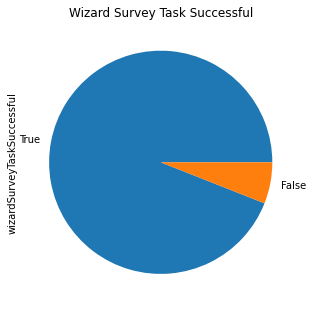

In [74]:
plt.figure(figsize=(5,10))   #setting figure size
df['wizardSurveyTaskSuccessful'].value_counts().plot.pie()  #ploting using pandas plot function
plt.title("Wizard Survey Task Successful")  #assigning the title
plt.show()   

### User IDs

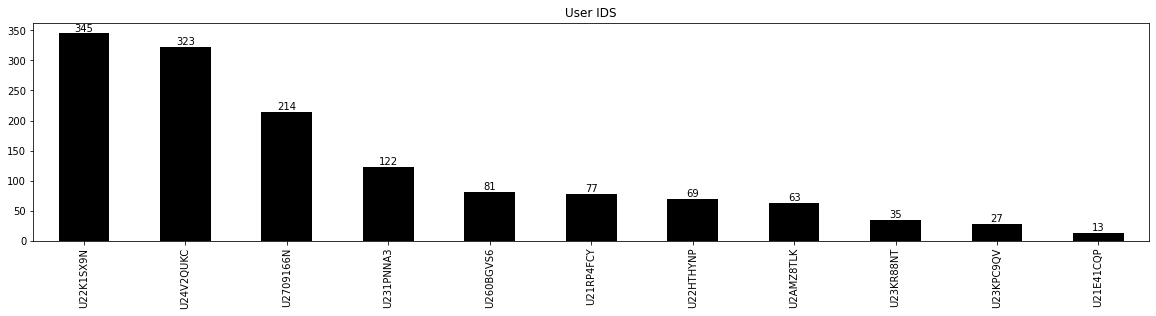

In [75]:
fig,ax = plt.subplots(figsize=(20,4))   #defining the fig size
df['user_id'].value_counts().sort_values(ascending=False).plot(kind = 'bar',color='black')  #creating bar from top 10 values
for container in ax.containers:   #code for creating labeling bar of the bar chart
    ax.bar_label(container)
ax.set(title="User IDS")
plt.show()

### Wizard IDs

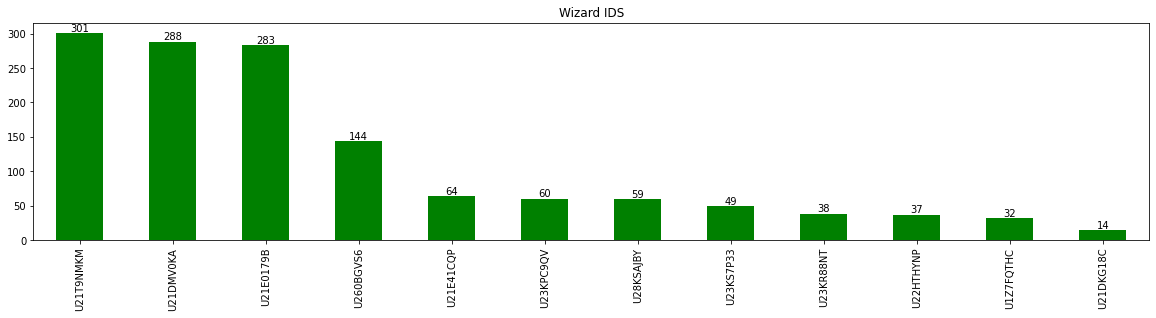

In [76]:
fig,ax = plt.subplots(figsize=(20,4))   #defining the fig size
df['wizard_id'].value_counts().sort_values(ascending=False).plot(kind = 'bar',color='green')  #creating bar from top 10 values
for container in ax.containers:   #code for creating labeling bar of the bar chart
    ax.bar_label(container)
ax.set(title="Wizard IDS")
plt.show()

# Extracting Text

In [77]:
def extract_text(turn):
#     print(pd.DataFrame(turn)['text'])
    return pd.DataFrame(turn)['text']

In [78]:
df['text']=df['turns'].apply(lambda x:''.join(extract_text(x)))
# df1['turns'].apply(lambda x:extract_text(x))

In [79]:
corpus=''.join(df['text'])

# Parts of Speech Counts

In [80]:
from textblob import TextBlob   #package for text analysis

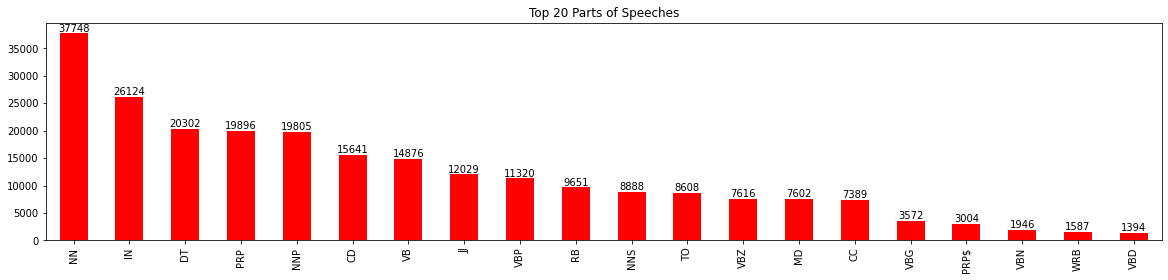

In [81]:
fig,ax = plt.subplots(figsize=(20,4))  #define figure size
blob = TextBlob(str(corpus))   #comments variable contains all the comments
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind = 'bar',color='red')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Top 20 Parts of Speeches")
plt.show()

### Text Metrics

In [82]:
from neattext import TextMetrics    #importing textmetrics from neattext
docx = TextMetrics()
docx.text = corpus
docx.word_stats()              #displaying the word statistics

{'text_length': 1305275,
 'num_of_vowels': 390194,
 'num_of_consonants': 595979,
 'num_of_stopwords': 115694,
 'vowels_stats': {'a': 91478, 'e': 108791, 'i': 66014, 'o': 87481, 'u': 36430},
 'consonants_stats': {'b': 18481,
  'c': 21732,
  'd': 33097,
  'f': 24308,
  'g': 23527,
  'h': 47566,
  'j': 1551,
  'k': 15325,
  'l': 43991,
  'm': 21591,
  'n': 58642,
  'p': 18171,
  'q': 371,
  'r': 54689,
  's': 59551,
  't': 93965,
  'v': 11483,
  'w': 19524,
  'x': 1226,
  'y': 26561,
  'z': 627}}

# Text Cleaning

### Removing Multiple Spaces

In [83]:
df['cleaned_text']=df['text'].apply(lambda x:' '.join(str(x).split()))

# Fixing Contractions ==> don't --> do not

In [84]:
df['cleaned_text']=df['cleaned_text'].apply(lambda x:nt.fix_contractions(x))

### Removing Stopwords

In [85]:
df['cleaned_text']=df['cleaned_text'].apply(lambda x:nt.remove_stopwords(x))

### Removing Specila Characters

In [86]:
df['cleaned_text']=df['cleaned_text'].apply(lambda x:nt.remove_special_characters(x))

### Removing Numbers

In [87]:
df['cleaned_text']=df['cleaned_text'].apply(lambda x:nt.remove_numbers(x))

# Most Common Words

In [88]:
cleaned_corpus=''.join(df['cleaned_text'])

In [89]:
common_words=Counter(cleaned_corpus.split()) #counting most common words

In [90]:
common_words_df=pd.DataFrame(common_words.items())  #creating data frame of common words

In [91]:
common_words_df.columns=['Words','Counts']         #assigning names to features

### Most Common Words

In [92]:
common_words_df=common_words_df.sort_values(by="Counts",ascending=False)

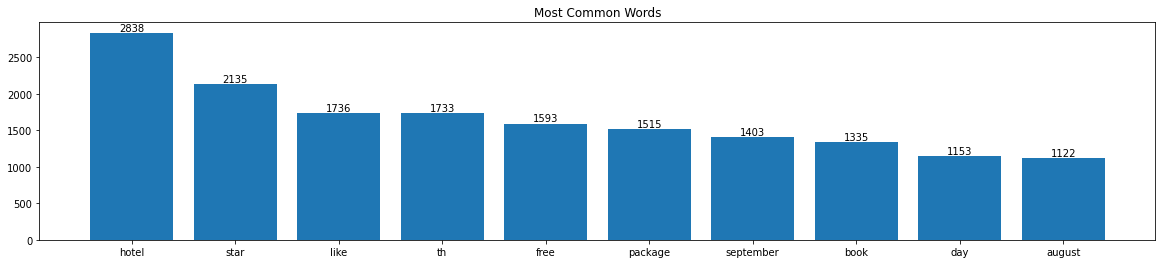

In [93]:
fig,ax = plt.subplots(figsize=(20,4))  #define figure size
plt.bar(common_words_df['Words'][0:10],common_words_df['Counts'][0:10])
plt.title("Most Common Words")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Named Entity Recognition

In [94]:
import spacy #package for text analysis

In [95]:
nlp=spacy.load("en_core_web_sm") #loading spacy model

In [96]:
# function to get entities
def entity_entractor(text):
    docx=nlp(text)
    ents_list=[(ent.text,ent.label_) for ent in docx.ents]
    df=pd.DataFrame(ents_list,columns=["Entity","Tag"])
    return df

In [97]:
ents_df=entity_entractor(cleaned_corpus)

### Top Entities

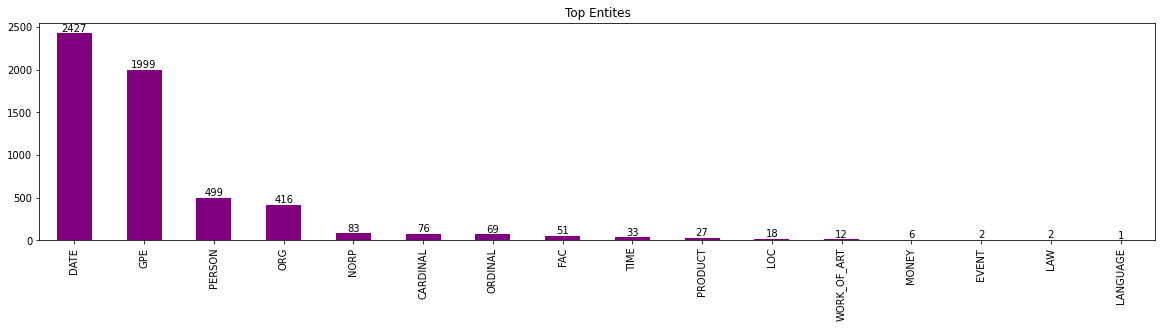

In [98]:
fig,ax = plt.subplots(figsize=(20,4))  #define figure size
ents_df['Tag'].value_counts().plot(kind='bar',color="purple")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Top Entites")
plt.show()

# Displaying Entities

In [99]:
print("Entity"+"\t"+"Tag")
for i in range(len(ents_df)) :
  print(ents_df.loc[i, "Entity"], ents_df.loc[i, "Tag"])

Entity	Tag
atlantis PRODUCT
saturday DATE
august DATE
hii ORG
august     DATE
atlantis PRODUCT
datesi suppose speak PERSON
japan GPE
birminghami PERSON
birmingham kobe PERSON
kobe GPE
august DATE
birmingham kobe PERSON
birmingham GPE
wednesday DATE
august DATE
depart torontogotham PERSON
toronto GPE
august DATE
august DATE
dominican republic GPE
el mar ORG
caprica busan PERSON
sunday DATE
august DATE
wednesday DATE
august DATE
caprica busan PERSON
mannheim germany GPE
kingston  canada toronto canada ORG
sunday DATE
sunday DATE
august DATE
sunday DATE
denver GPE
august DATE
august DATE
august DATE
september DATE
august DATE
st louis th augustfor GPE
august DATE
august DATE
inn hotel st louis star ORG
saturday DATE
august DATE
week DATE
august DATE
mexico GPE
mexico city GPE
australia GPE
australia GPE
mexico GPE
australia GPE
pittsborgh GPE
pittsburgh GPE
mos eisley ORG
saturday DATE
august DATE
tuesday DATE
august DATE
monday DATE
august DATE
wednesday DATE
august DATE
mexico porto GPE

### Entities Visualization

In [274]:
from spacy import displacy  #dependency for entities visualization

In [ ]:
doc = nlp(cleaned_corpus)
displacy.serve(doc, style="ent")


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

